**Importing Libraries**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**We have collected air quality dataset from UCI machine learning repository**(https://archive.ics.uci.edu/ml/datasets/Air+Quality). 

**Air quality data stored in excel file is loaded using pandas pd.read_excel() function.**

In [0]:
raw_data = pd.read_excel('/content/drive/Shared drives/CMPE 295A-Final Project/Datasets/AirQualityUCI/AirQualityUCI.xlsx')

**Data before preprocessing**

**Missing values in data is filled with -200**

In [147]:
raw_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


# **Data Preprocessing**

**1.We are replacing -200 with NaN**

In [0]:
raw_data=raw_data.replace(-200, np.nan)

In [0]:
raw_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [0]:
raw_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.707856,218.811816,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,1.453252,217.084571,204.459921,7.449640,266.829000,212.971224,256.815106,48.359250,346.204540,398.480897,8.832888,17.316389,0.403813
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.100000,936.750000,67.000000,4.436942,734.375000,98.000000,657.875000,78.000000,1226.625000,731.375000,11.787500,35.812500,0.736769
50%,1.800000,1063.000000,150.000000,8.239851,909.000000,179.800000,805.500000,109.000000,1462.750000,963.250000,17.750000,49.550000,0.995395
75%,2.900000,1231.250000,297.000000,13.988478,1116.250000,326.000000,969.250000,142.000000,1673.500000,1273.375000,24.400000,62.500001,1.313701
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


**2. Imputation of missing values**

**2.a) Imputation using mean**

In [0]:
mean_data=raw_data.drop(columns=['Date','Time'])

In [0]:
mean_data=mean_data.apply(lambda x: x.fillna(x.mean()),axis=0)

In [0]:
mean_data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150.000000,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112.000000,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88.000000,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80.000000,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51.000000,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,218.811816,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,218.811816,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,218.811816,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,218.811816,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [0]:
#df_data=mean_data[['CO(GT)','NO2(GT)','T','RH']]

In [0]:
mean_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.152750,1099.707856,218.811816,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,1.316068,212.796116,63.870229,7.302474,261.557856,193.419417,251.741784,43.911095,339.365351,390.609000,8.658396,16.974308,0.395836
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.200000,941.250000,218.811816,4.591495,742.500000,112.000000,665.500000,85.900000,1241.500000,741.750000,12.025000,36.550000,0.746115
50%,2.152750,1074.500000,218.811816,8.593367,923.250000,229.000000,817.500000,113.075515,1456.143486,982.500000,18.275000,49.232360,1.015441
75%,2.600000,1221.250000,218.811816,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


**K-means Clustering**

In [0]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [0]:
X=mean_data.to_numpy()

In [153]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [154]:
kmeans.cluster_centers_

array([[1.52163369e+00, 9.80129858e+02, 2.08301961e+02, 5.96405700e+00,
        7.89069843e+02, 1.72873114e+02, 9.52375546e+02, 9.79885512e+01,
        1.30669194e+03, 8.00393587e+02, 1.76036613e+01, 4.90267621e+01,
        9.83340246e-01],
       [3.32424391e+00, 1.32167178e+03, 2.38320494e+02, 1.77286750e+01,
        1.21738784e+03, 3.84257162e+02, 6.18183912e+02, 1.41080347e+02,
        1.73355950e+03, 1.43558176e+03, 1.96384167e+01, 4.96139968e+01,
        1.10384438e+00]])

In [0]:
kmean_l=pd.DataFrame(kmeans.labels_)

In [0]:
count=0
count1=0
count2=0
for index, row in kmean_l.iterrows():
 if(row[0]==0):
   count=count+1
 elif(row[0]==1):
   count1=count1+1

In [157]:
print("High =",count)
print("Low =",count1)

High = 6083
Low = 3274


In [0]:
mean_data['labels']=kmean_l

In [0]:
mean_data.head(100)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,labels
0,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,1
1,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,0
2,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,0
3,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,1
4,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.9,1437.75,156.0,12.033005,1050.75,180.0,942.50,128.0,1667.50,1206.25,21.300,30.750000,0.769615,1
96,2.5,1477.75,122.0,12.163323,1055.25,160.0,929.25,121.0,1670.75,1262.25,19.650,36.700000,0.830706,1
97,4.6,1807.50,262.0,20.571715,1312.25,261.0,753.25,157.0,1992.75,1697.75,18.375,41.725000,0.873196,1
98,5.9,1898.00,341.0,23.142126,1381.25,325.0,680.50,173.0,2102.75,1904.75,17.625,46.099999,0.920954,1


**Correlation Matrix with target label**

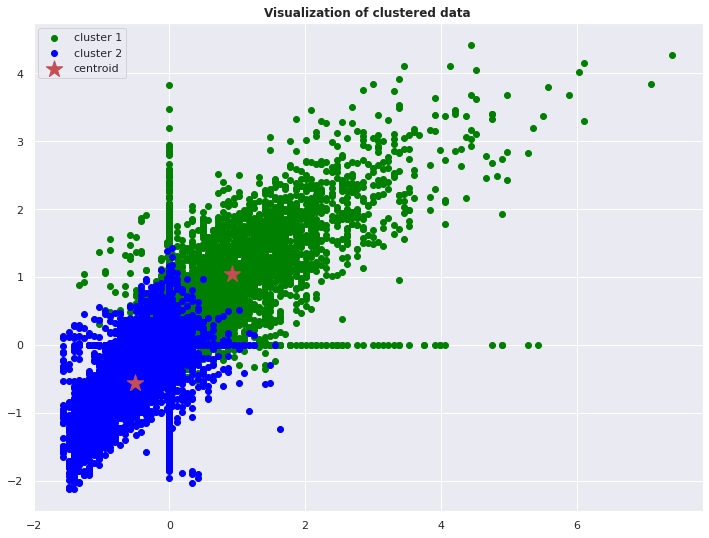

In [159]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(mean_data)
# Plot the clustered data
# Run local implementation of kmeans
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(12, 12))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1], 
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
           c='r', label='centroid')
plt.legend()
#plt.xlim([-2, 2])
#plt.ylim([-2, 2])
plt.xlabel('')
plt.ylabel('')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

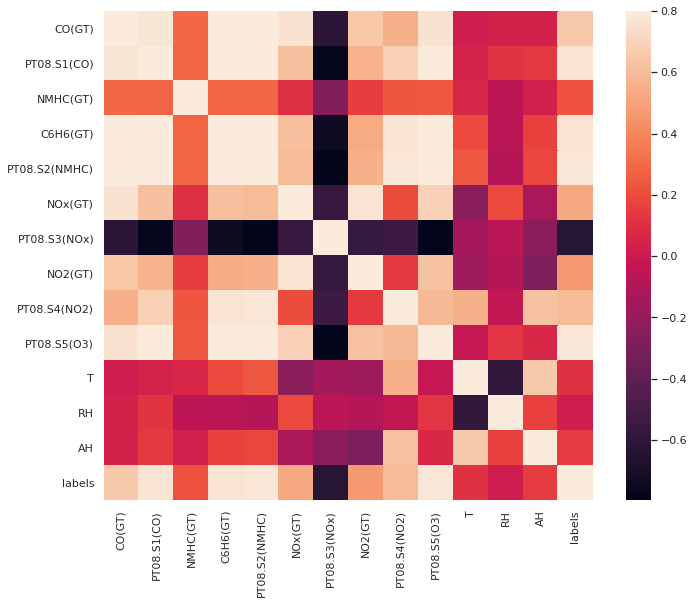

In [160]:
#correlation matrix
corrmat = mean_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Drop the columns based on correlation of attributes with target label.

In [0]:
reduced_data=mean_data.drop(columns=['NMHC(GT)','PT08.S3(NOx)','AH'])


In [0]:
reduced_data.to_csv('Final_Preprocessed_Data.csv',index=False)

# **Data Visualization**

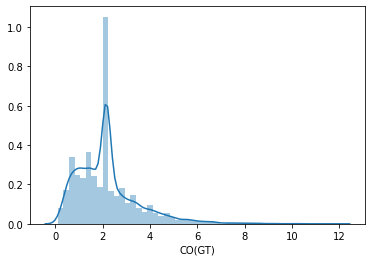

In [0]:
sns.distplot(reduced_data['CO(GT)']);

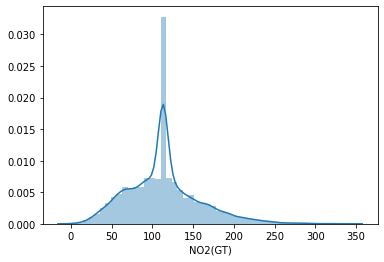

In [0]:
sns.distplot(reduced_data['NO2(GT)']);

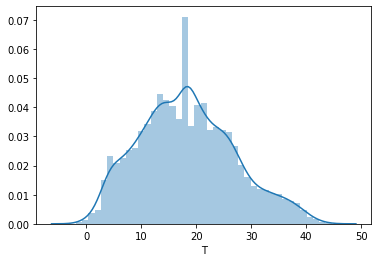

In [0]:
sns.distplot(reduced_data['T']);

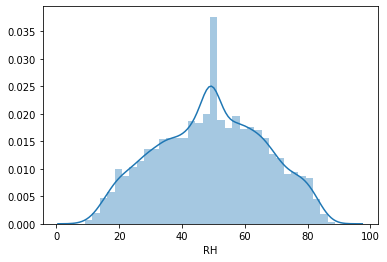

In [0]:
sns.distplot(reduced_data['RH']);

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


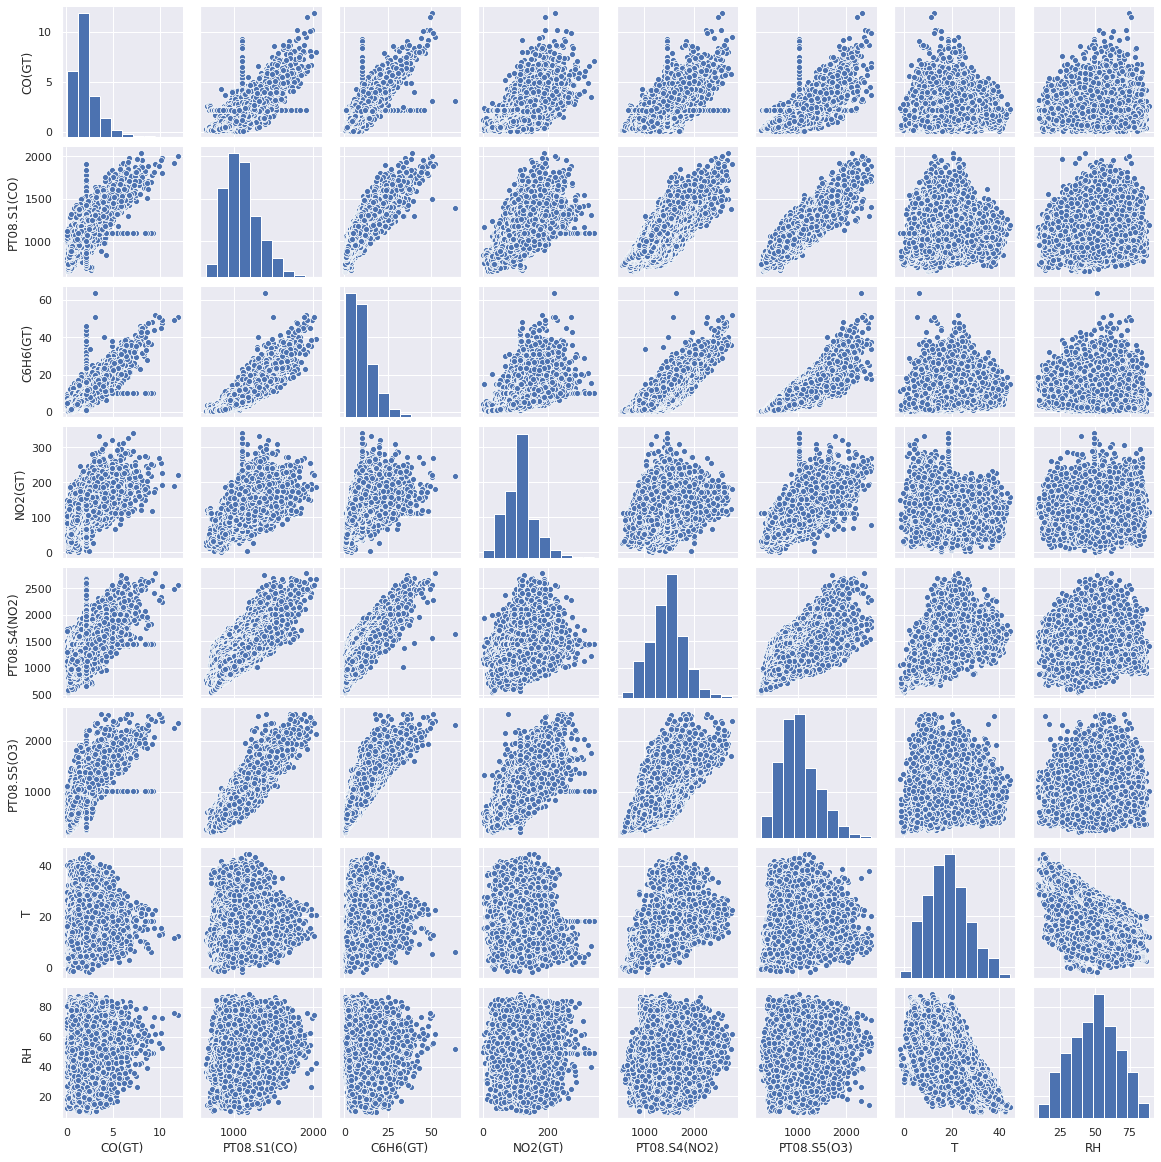

In [0]:
#scatterplot
sns.set()
cols = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)',
          'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)','T','RH']
sns.pairplot(reduced_data[cols], size = 2)
plt.show();

In [0]:
set1 = ['NO2(GT)']
set2 = ['CO(GT)' ]
set3 = ['T']
set4 = ['RH']


In [0]:
raw_data['Index'] = raw_data.Date
raw_data['Index'] = raw_data['Index'].astype(str)

In [0]:
import datetime
raw_data['Day'] = raw_data['Index'].map( lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%A'))
raw_data['Month'] = raw_data['Index'].map( lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%m'))
raw_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Index,Day,Month
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10,Wednesday,03
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10,Wednesday,03
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10,Wednesday,03
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10,Wednesday,03
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10,Wednesday,03


In [0]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_data = raw_data.groupby('Day').mean()
weekly_data['Day'] = weekly_data.index
weekly_data = weekly_data.reindex(cats)
weekly_data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day
Day,,,,,,,,,,,,,,
Monday,2.016741,1069.591264,180.110169,9.954424,927.175301,234.912823,859.880404,110.279768,1432.991110,976.898631,18.016072,47.562593,0.983539,Monday
Tuesday,2.382267,1116.516588,233.583333,11.680115,987.971134,267.665193,811.820598,117.384478,1504.615138,1080.512931,18.318894,48.598465,1.014063,Tuesday
Wednesday,2.400787,1126.683187,219.561151,11.399014,985.885492,270.413390,808.932654,119.981367,1509.471823,1100.423261,18.535751,50.076272,1.049379,Wednesday
Thursday,2.455505,1140.159341,278.800000,11.527253,991.068943,282.588403,798.677263,120.824799,1518.689037,1108.888409,18.608091,50.110544,1.057239,Thursday
Friday,2.543041,1143.846149,287.302469,11.729513,1001.237990,284.489634,786.275564,123.434729,1527.366210,1107.852120,18.780012,50.141902,1.064917,Friday
Saturday,1.861077,1089.845884,164.563636,8.507796,897.508597,224.468559,836.630146,107.560811,1397.282693,982.206200,18.198827,48.949636,1.011683,Saturday
Sunday,1.438069,1016.784232,99.114583,6.051220,791.691281,161.988018,939.578208,91.641106,1313.113452,815.878955,17.799576,49.274747,1.001677,Sunday


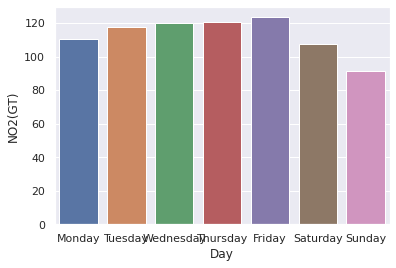

In [0]:
sns.barplot(x="Day", y=set1[0], data=weekly_data)

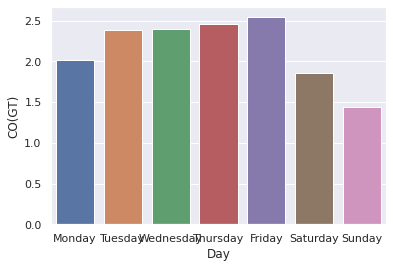

In [0]:
sns.barplot(x="Day", y=set2[0], data=weekly_data)

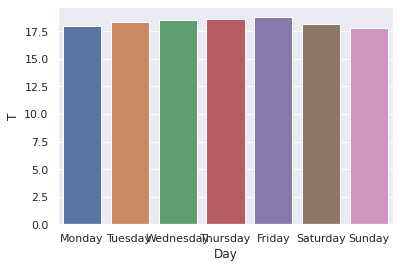

In [0]:
sns.barplot(x="Day", y=set3[0], data=weekly_data)

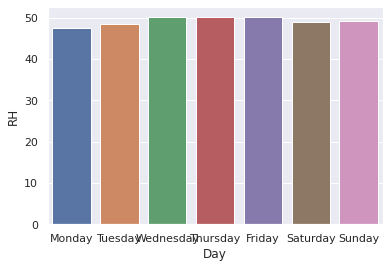

In [0]:
sns.barplot(x="Day", y=set4[0], data=weekly_data)

In [0]:
monthly_data = raw_data.groupby('Month').mean()
monthly_data['Month'] = monthly_data.index
monthly_data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
Month,,,,,,,,,,,,,,
01,2.135059,1110.826257,NaN,9.025913,891.624695,349.763803,792.441069,134.742535,1153.343582,1097.440947,8.220132,56.563995,0.635098,01
02,2.096229,1087.574525,NaN,7.501238,842.155621,314.993925,791.863674,160.633489,1057.504614,1032.108361,7.110640,52.080845,0.517457,02
03,2.144079,1176.730779,171.604423,9.218447,907.181165,243.147502,839.420059,123.247256,1366.344706,1060.702780,13.693130,50.606418,0.784860,03
04,2.142931,1139.384295,256.671937,9.709272,921.125748,145.633508,931.475321,98.697731,1539.884295,964.091346,16.783152,49.007853,0.887402,04
05,1.940034,1076.553539,275.000000,10.218922,950.977626,122.132107,947.367237,93.148829,1600.989954,928.084361,20.279943,43.540708,0.957332,05
06,1.900000,1020.665445,NaN,10.594939,966.252933,122.064715,900.347385,94.084877,1722.252933,937.494990,26.474291,39.847691,1.275378,06
07,1.784946,1046.296321,NaN,10.598282,971.335464,126.754213,804.763459,104.120956,1643.698295,994.322118,29.418528,33.054767,1.242712,07
08,1.280084,980.922542,NaN,6.992596,838.355156,75.868526,835.717266,70.097804,1580.818106,777.244125,29.130396,42.977446,1.619436,08
09,2.164209,1081.451686,NaN,11.555073,993.361230,280.572072,810.281695,108.047297,1546.606007,1036.292616,24.621201,43.988972,1.285426,09


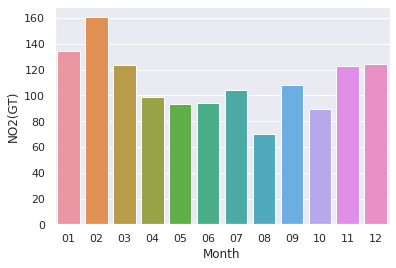

In [0]:
sns.barplot(x="Month", y=set1[0], data=monthly_data)

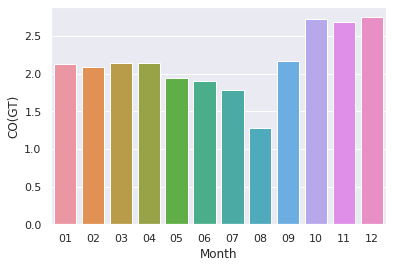

In [0]:
sns.barplot(x="Month", y=set2[0], data=monthly_data)

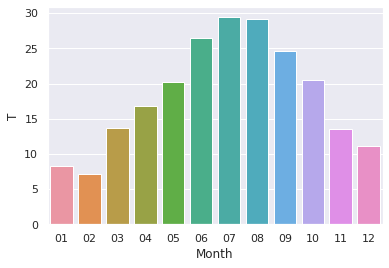

In [0]:
sns.barplot(x="Month", y=set3[0], data=monthly_data)

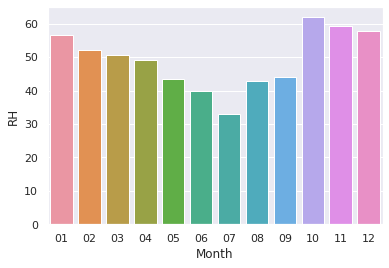

In [0]:
sns.barplot(x="Month", y=set4[0], data=monthly_data)

In [0]:
l[0] = l[0].map({'Moderate': 1, 'High': 0})
